Model taken from 

    Smith, Amber M., and Amanda P. Smith. "A critical, nonlinear threshold dictates bacterial invasion and initial kinetics during influenza." Scientific reports 6.1 (2016): 38703.

In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_coinfection
from stochastic_tests import Test

t_fin = 18.0
num_steps = 100
stdev_fact = 0.25

test = Test(model=model_coinfection({'beta': ('norm', (2.8E-6, 0.28E-6 * stdev_fact)),
                                     'k': ('norm', (4.0, 4.0 * stdev_fact)),
                                     'delta': ('norm', (0.89, 0.89 * stdev_fact)),
                                     'p': ('norm', (25.1, 25.1 * stdev_fact)),
                                     'c': ('norm', (28.4, 28.4 * stdev_fact)),
                                     'r': ('norm', (27.0, 27.0 * stdev_fact)),
                                     'KP': ('norm', (2.3E8, 2.3E8 * stdev_fact)),
                                     'gammaMA': ('norm', (1.35E-4, 1.35E-4 * stdev_fact)),
                                     'psi': ('norm', (1.2E-8, 1.2E-8 * stdev_fact)),
                                     't0': ('norm', (7.0, 7.0 * stdev_fact))}),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=False)

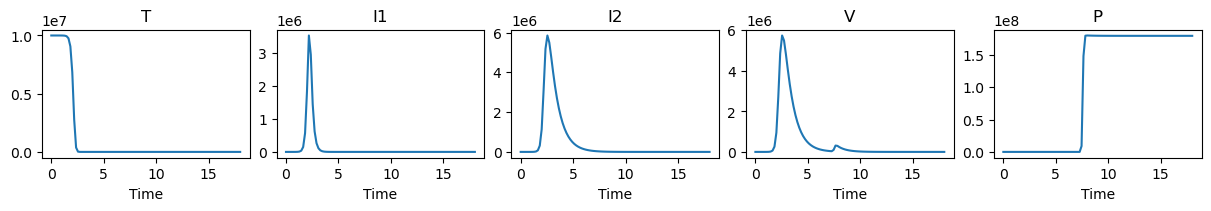

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

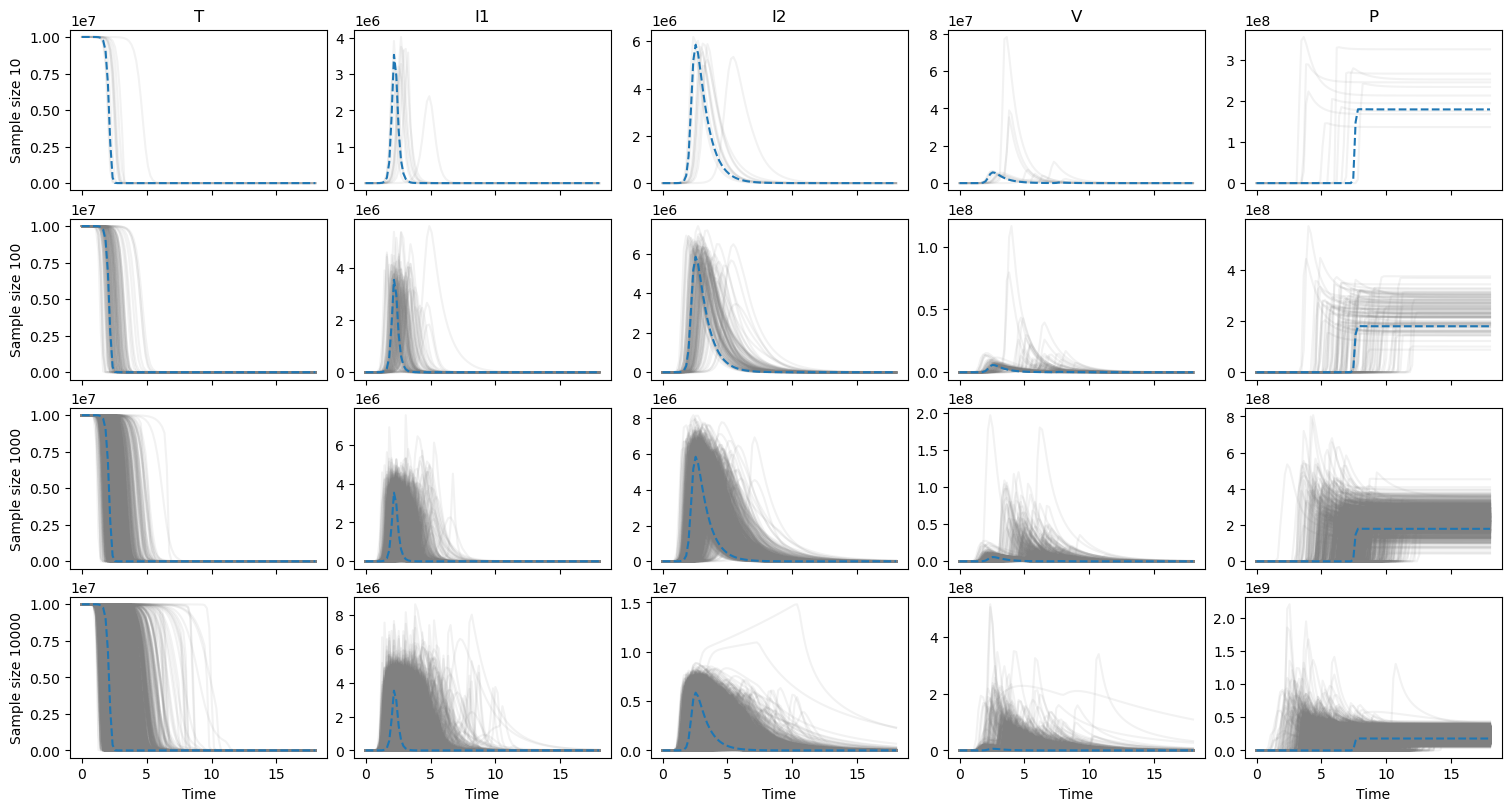

In [4]:
_ = test.plot_results_stochastic()

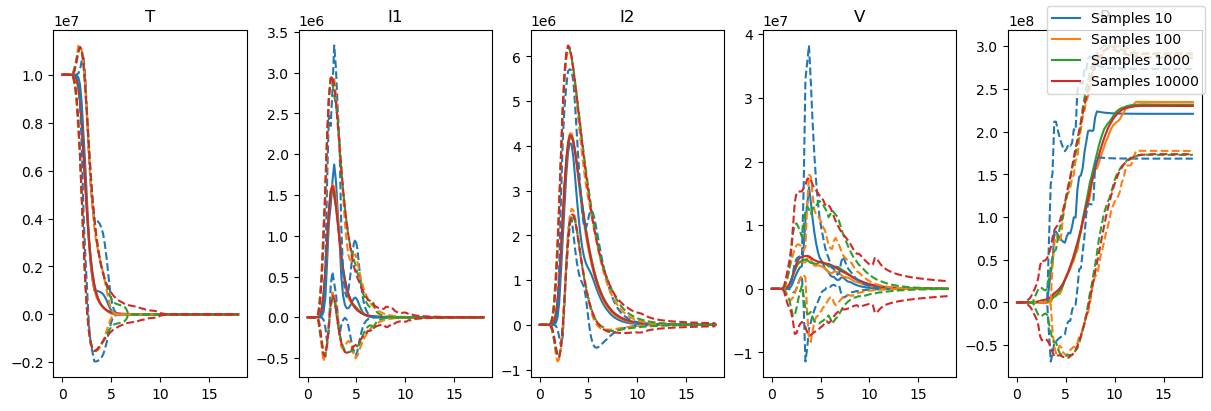

In [5]:
_ = test.plot_stats()

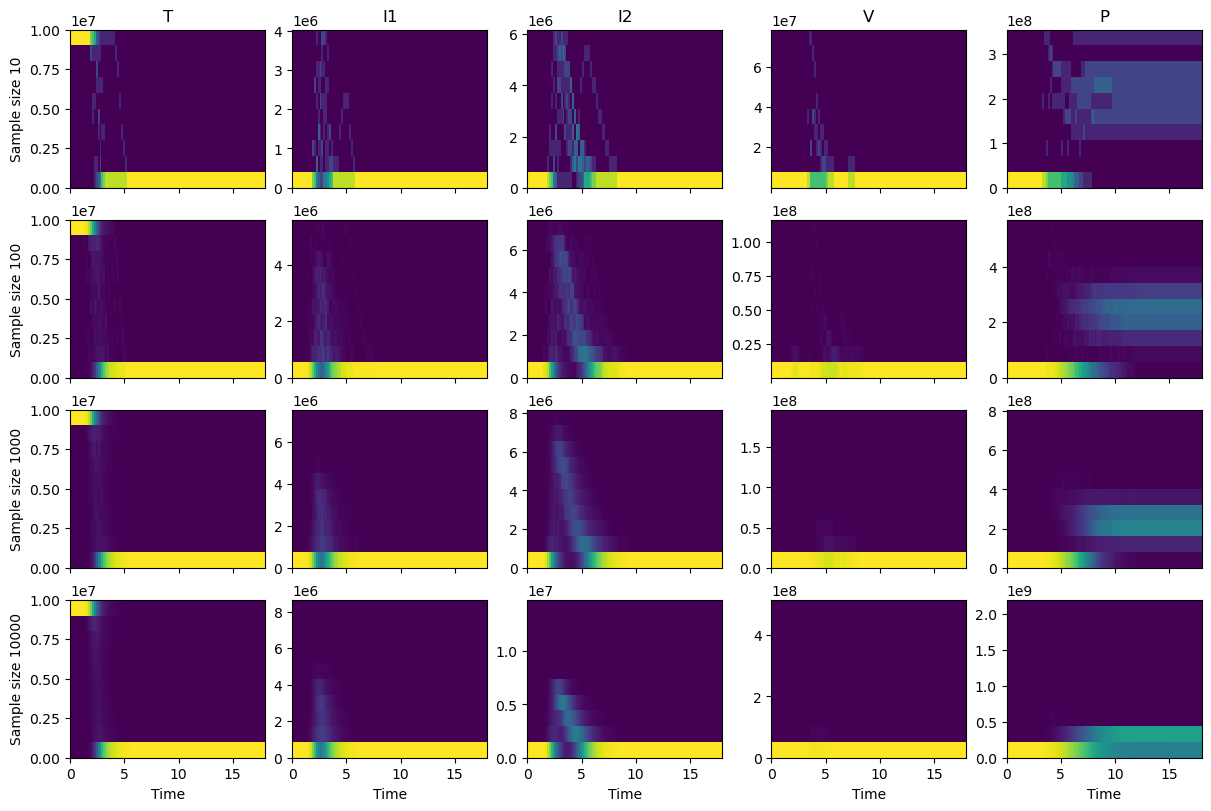

In [6]:
_ = test.plot_distributions()

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()

In [8]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	T: 1.485585075637044
	I1: 1.8651610456849028
	I2: 1.6053480353374465
	V: 1.6369476115587684
	P: 1.489868559504814
100 trials
	T: 0.45976558558421604
	I1: 0.5265403901640615
	I2: 0.568619324803527
	V: 0.4887948797064417
	P: 0.4171115970415186
1000 trials
	T: 0.11797193890570859
	I1: 0.12873876841484758
	I2: 0.1589775052755187
	V: 0.19959236428902283
	P: 0.17289175109159832
10000 trials
	T: 0.04492309486684403
	I1: 0.04566970301717595
	I2: 0.05574579476827819
	V: 0.04423725547186121
	P: 0.05097575310101687


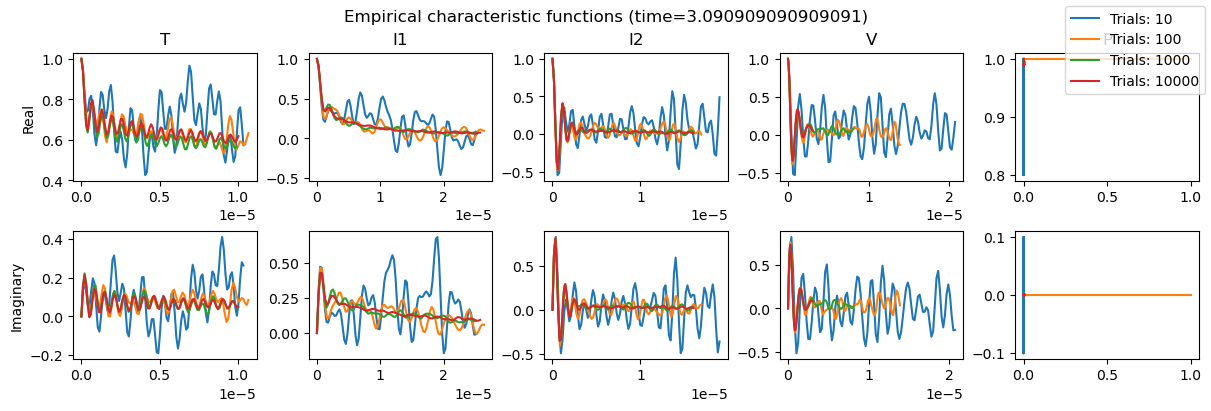

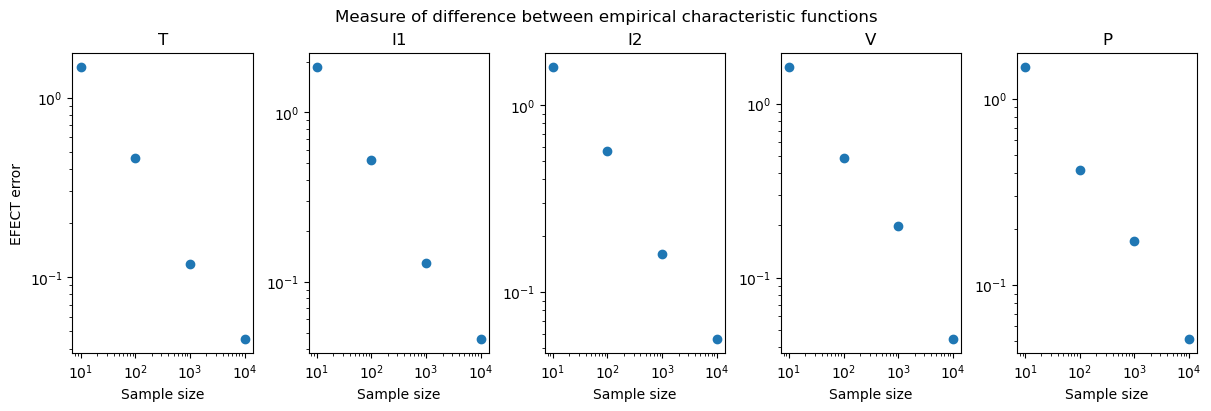

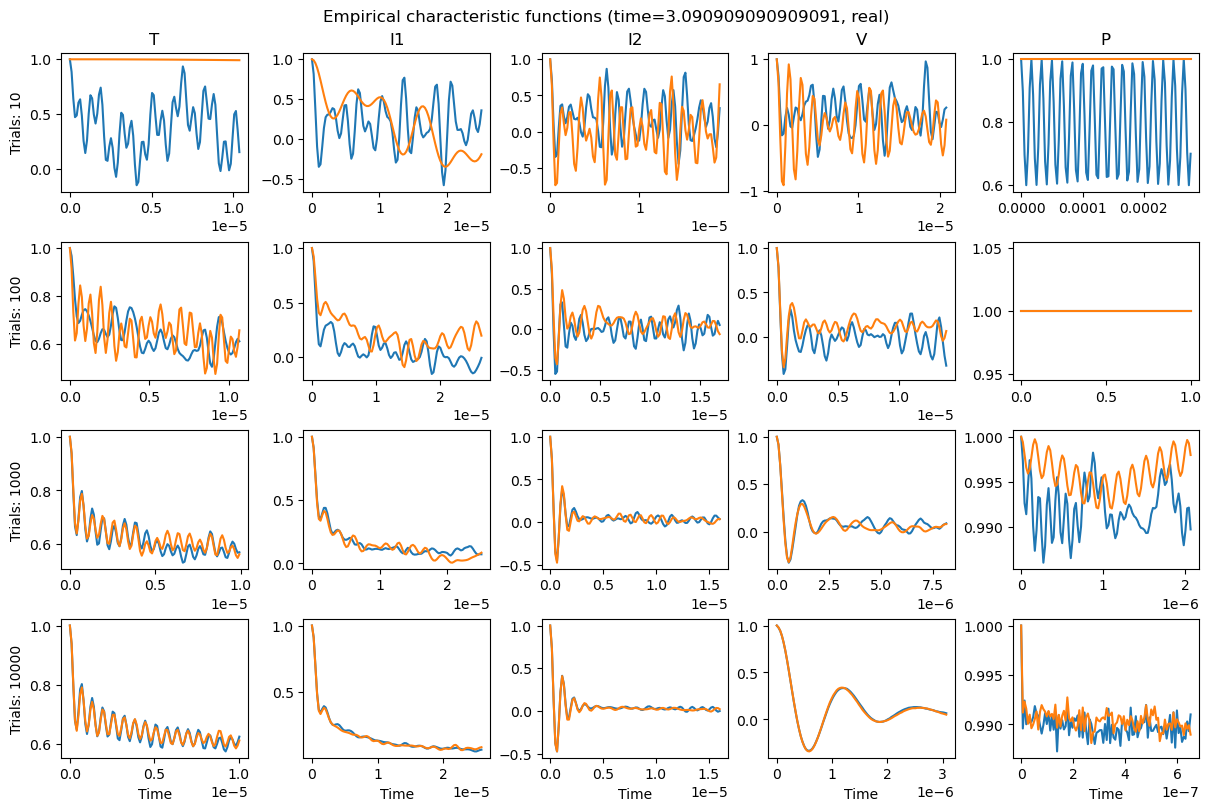

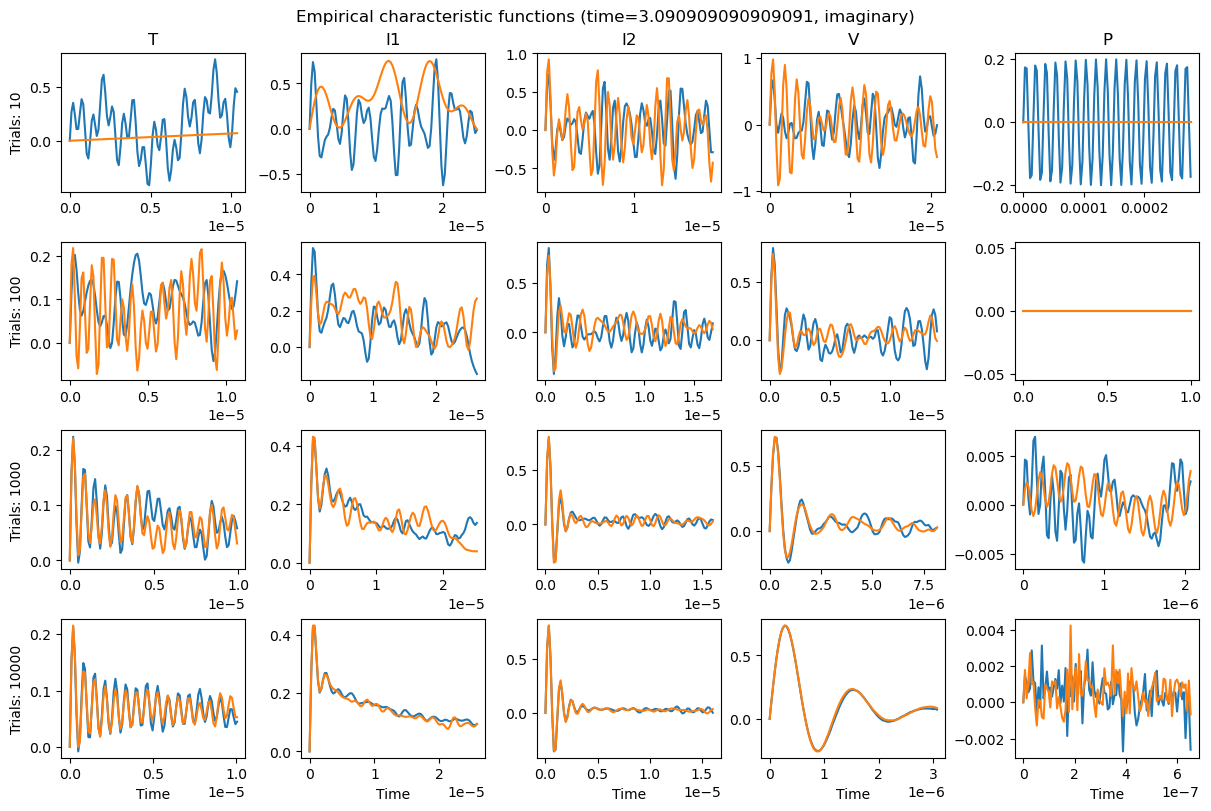

In [9]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [10]:
test.generate_ecf_diff_fits()

C:\Users\timothy.sego\AppData\Local\miniconda3\envs\stoch_repro\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


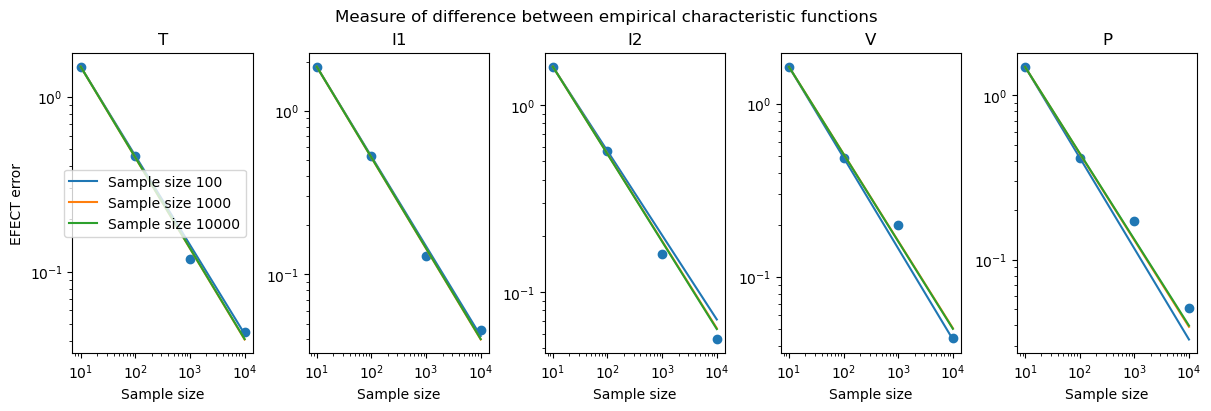

In [11]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [12]:
# Runtime: ~5 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

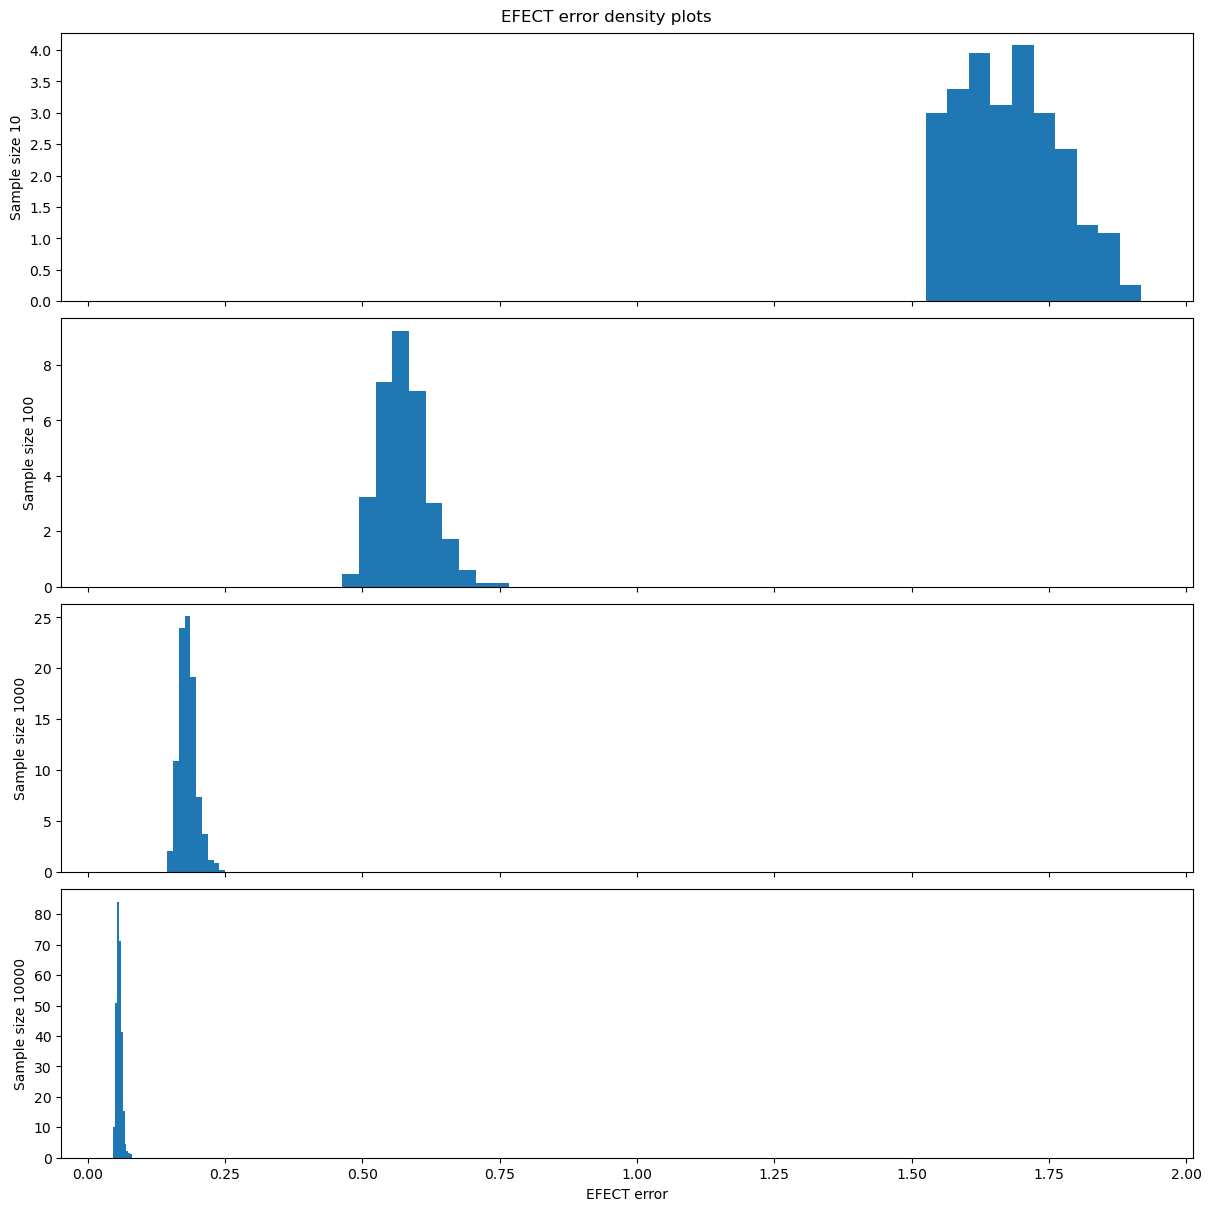

In [13]:
_ = test.plot_ks_sampling()

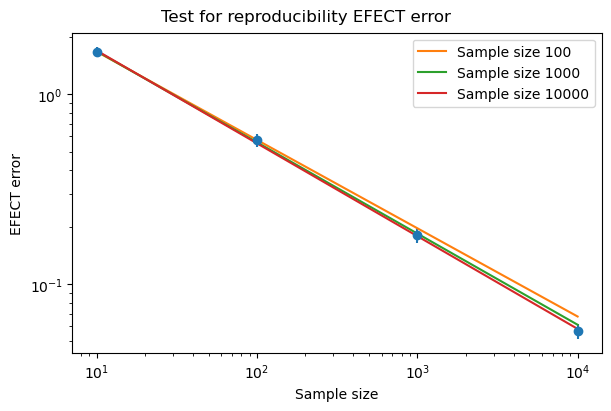

In [14]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()